In [116]:
#Team Members: Pranav Sekhar (me), Ajay Gopi, Shrey Samdani
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [117]:
wine = pd.read_csv("project1/data.csv")
wine.labels = wine.iloc[:,[-1]]
wine.feats = wine.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
wine_training_feats = wine.feats[:4800]
wine_training_labs = wine.labels[:4800]
wine_valid_feats = wine.feats[4800:]
wine_valid_labs = wine.labels[4800:]

In [118]:
def train(wine_training_feats, wine_training_labs, wine_valid_feats, wine_valid_labs,sampleSize, regType):
    X = wine_training_feats[:sampleSize]
    y = wine_training_labs[:sampleSize]
    logModel = LogisticRegression(penalty=regType)
    logModel.fit(X, y)
    pred = logModel.predict(wine_valid_feats)
    score_validation = metrics.accuracy_score(wine_valid_labs, pred)

    return [score_validation, pred] #returns validiation accuracy

In [119]:
runs = [100,200,500,1000,4800]
validsL1 = []
for i in runs:
    validsL1.append(train(wine_training_feats, wine_training_labs, wine_valid_feats, wine_valid_labs, i, 'l1')[0])

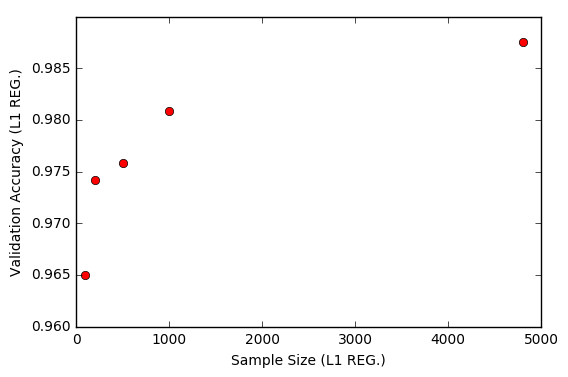

In [120]:
plt.plot(runs, validsL1, 'ro')
plt.xlabel('Sample Size (L1 REG.)')
plt.ylabel('Validation Accuracy (L1 REG.)')
plt.show()

In [121]:
validsL2 = []
for i in runs:
    validsL2.append(train(wine_training_feats, wine_training_labs, wine_valid_feats, wine_valid_labs, i, 'l2')[0])

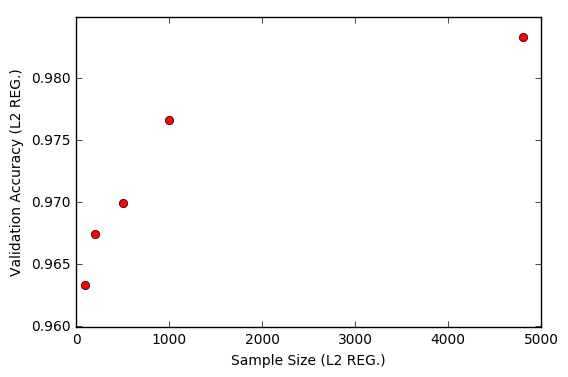

In [122]:
plt.plot(runs, validsL2, 'ro')
plt.xlabel('Sample Size (L2 REG.)')
plt.ylabel('Validation Accuracy (L2 REG.)')
plt.show()

In [123]:
print('L1 regularization performed better.')

L1 regularization performed better.


In [136]:
#Question 9: Kaggle submission stuff
test = pd.read_csv("project1/test.csv")
test.feats = test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]


logModel_9 = LogisticRegression(penalty='l1')
logModel_9.fit(wine.feats, wine.labels)
results = logModel_9.predict(test.feats)

np.savetxt("project1/submission.csv", results, delimiter=',')